In [1]:
%matplotlib inline
import pandas as pd
import sklearn as skl
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
hr_df = pd.read_csv('./data/hr_dataset.csv')
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [3]:
def scale_df(data):
    data = data.copy()

    scaler = StandardScaler()
    scaler.fit(data)
    scaled_data = scaler.transform(data)

    scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
    
    return scaled_df


In [4]:
hr_df_scaled = scale_df(hr_df)

In [5]:
def split_data_X_y(data, target):
    data = data.copy()

    X = data.copy()
    X = X.drop(columns=target)

    y = data[target].ravel()
    
    return X, y

In [6]:
X, y = split_data_X_y(hr_df, 'Num_Promotions')

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
def make_model(X, hidden_layers, activation_fxn):
    X_column_count = len(X.columns)
    # init model
    model = tf.keras.models.Sequential()
    # add hidden layers with
    model.add(tf.keras.layers.Dense(units=hidden_layers, activation=activation_fxn, input_dim=X_column_count))

    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    print(model.summary())
    return model

In [9]:
nn_model = make_model(X, hidden_layers=1, activation_fxn='relu')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
def compile_and_fit(model, X_train, y_train, n_epochs):

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    fit_model = model.fit(X_train, y_train, epochs=n_epochs)

    return fit_model 

In [11]:
nn_fit_model = compile_and_fit(nn_model, X_train, y_train, n_epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 613ms/step - loss: 5473.2334 - accuracy: 0.0476
Epoch 2/300
1/1 [==============================] - 0s 4ms/step - loss: 5461.5366 - accuracy: 0.0476
Epoch 3/300
1/1 [==============================] - 0s 4ms/step - loss: 5449.8535 - accuracy: 0.0476
Epoch 4/300
1/1 [==============================] - 0s 3ms/step - loss: 5438.1821 - accuracy: 0.0476
Epoch 5/300
1/1 [==============================] - 0s 6ms/step - loss: 5426.5244 - accuracy: 0.0476
Epoch 6/300
1/1 [==============================] - 0s 3ms/step - loss: 5414.8804 - accuracy: 0.0476
Epoch 7/300
1/1 [==============================] - 0s 5ms/step - loss: 5403.2490 - accuracy: 0.0476
Epoch 8/300
1/1 [==============================] - 0s 3ms/step - loss: 5391.6338 - accuracy: 0.0476
Epoch 9/300
1/1 [==============================] - 0s 2ms/step - loss: 5380.0303 - accuracy: 0.0476
Epoch 10/300
1/1 [==============================] - 0s 4ms/step - loss: 5368.4429 - accuracy: 0.04

In [12]:
def get_accuracy_loss(fit_model):
    index_range = range(1, len(fit_model.history['loss'])+1)

    accuracy_loss_df = pd.DataFrame(fit_model.history, index=index_range)

    plt.subplots()
    plt.plot(accuracy_loss_df, label=['loss','accuracy'])
    plt.title(f'accuracy & loss metrics, {len(index_range)} epochs')
    plt.legend()
    plt.show()

    return accuracy_loss_df

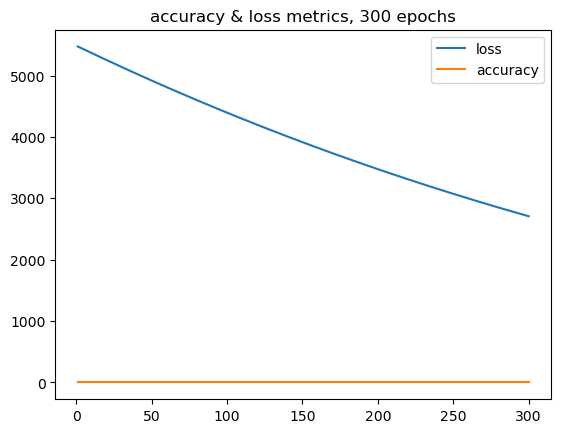

In [13]:
accuracy_loss_df = get_accuracy_loss(nn_fit_model)